In [1]:
import os

import pandas as pd
import numpy as np


# Football matches dataset

This is a custom dataset generated from an public StatsBomb open dataset, using a custom algorithm to create extra synthetic data to give more insign on to the sports dynamic and structure.

## Data pre-processing


The data will be:
+ cleaned from irrelevant data
  + Collumns missing
  + removed irrelevant events by their type
+ resampled according to the target classes
  + the target classes are highly imbalanced
+ scaled feature values
  + many of the features had different scales 

> The following step removes about 200 features wich are not relevant to the target class

In [2]:
dataset = pd.read_csv("temp_dataset.csv", low_memory=False)

dataset = dataset[
    [
        "type_id",
        "type_name",
        "delta_direct_angle",
        "directness",
        "goal_scored",
        "indirect_distance",
        "opo_goal_angle",
        "opo_goal_distance",
        "opo_team_mat_delta_direct_angle",
        "opo_team_mat_directness",
        "opo_team_mat_indirect_distance",
        "opo_team_mat_opo_goal_angle",
        "opo_team_mat_opo_goal_distance",
        "opo_team_mat_own_goal_angle",
        "opo_team_mat_own_goal_distance",
        "opo_team_ses_delta_direct_angle",
        "opo_team_ses_directness",
        "opo_team_ses_indirect_distance",
        "opo_team_ses_opo_goal_angle",
        "opo_team_ses_opo_goal_distance",
        "opo_team_ses_own_goal_angle",
        "opo_team_ses_own_goal_distance",
        "own_goal_angle",
        "own_goal_distance",
        "own_team_mat_delta_direct_angle",
        "own_team_mat_directness",
        "own_team_mat_indirect_distance",
        "own_team_mat_opo_goal_angle",
        "own_team_mat_opo_goal_distance",
        "own_team_mat_own_goal_angle",
        "own_team_mat_own_goal_distance",
        "own_team_ses_delta_direct_angle",
        "own_team_ses_directness",
        "own_team_ses_indirect_distance",
        "own_team_ses_opo_goal_angle",
        "own_team_ses_opo_goal_distance",
        "own_team_ses_own_goal_angle",
        "own_team_ses_own_goal_distance",
    ]
]

dataset.head()

,type_id,type_name,delta_direct_angle,directness,goal_scored,indirect_distance,opo_goal_angle,opo_goal_distance,opo_team_mat_delta_direct_angle,opo_team_mat_directness,...,own_team_mat_opo_goal_distance,own_team_mat_own_goal_angle,own_team_mat_own_goal_distance,own_team_ses_delta_direct_angle,own_team_ses_directness,own_team_ses_indirect_distance,own_team_ses_opo_goal_angle,own_team_ses_opo_goal_distance,own_team_ses_own_goal_angle,own_team_ses_own_goal_distance
0,35,Starting XI,0.0,1.0,0,0.0,0.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,35,Starting XI,0.0,1.0,0,0.0,0.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,18,Half Start,0.0,1.0,0,0.0,0.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,18,Half Start,0.0,1.0,0,0.0,0.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,30,Pass,0.0,1.0,0,0.0,0.001333,60.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


> This is a temporary cleanup due to the dataset processing. This i supposed to be fixed after generating the database again.

In [3]:
# temporary change error in dataset

dataset = dataset.drop([
    "opo_team_mat_delta_direct_angle",
    "opo_team_mat_directness",
    "opo_team_mat_indirect_distance",
    "opo_team_mat_opo_goal_angle",
    "opo_team_mat_opo_goal_distance",
    "opo_team_mat_own_goal_angle",
    "opo_team_mat_own_goal_distance",
    "opo_team_ses_delta_direct_angle",
    "opo_team_ses_directness",
    "opo_team_ses_indirect_distance",
    "opo_team_ses_opo_goal_angle",
    "opo_team_ses_opo_goal_distance",
    "opo_team_ses_own_goal_angle",
    "opo_team_ses_own_goal_distance",
], axis=1)


> Events (rows) are removed based on their type. Some types are not relevant

In [4]:

for i in [22, 21, 19, 18, 34, 40, 27, 26, 25, 20, 41, 35, 36]:
    index_names = dataset[ 
        (dataset['type_id'] == i)
    ].index
    dataset.drop(index_names, inplace = True)

dataset['type_name'].value_counts()

Pass             108961
Ball Receipt*    100142
Carry             89811
Pressure          36619
Ball Recovery     11997
Duel               7008
Clearance          5035
Dribble            4576
Block              3897
Goal Keeper        3343
Miscontrol         3102
Dribbled Past      3006
Shot               2776
Dispossessed       2714
Interception       2119
Camera On           480
50/50               185
Camera off          115
Shield              114
Error                66
Bad Behaviour        62
Offside              42
Name: type_name, dtype: int64

In [5]:
dataset['goal_scored'].value_counts()

 0    380890
 1      4327
-1       953
Name: goal_scored, dtype: int64

> The data set is imbalanced by the nature of the sport itself, as it can be seen above. 

> The non-goal ending events are randomnly reduced to the number of goal ending events and the own-goal ending events are increased to the sumber of goal events.

In [6]:
from sklearn.utils import resample

df_majority = dataset[dataset['goal_scored'] == 0]
df_minority_plus = dataset[dataset['goal_scored'] == 1]
df_minority_minus = dataset[dataset['goal_scored'] == -1]

len(df_minority_plus)

df_majority = resample(df_majority, 
                        replace=False, 
                        n_samples=len(df_minority_plus),
                        random_state=123)

df_minority_minus = resample(df_minority_minus, 
                        replace=True, 
                        n_samples=len(df_minority_plus),
                        random_state=123)


dataset = pd.concat([df_majority, df_minority_plus, df_minority_minus])


dataset = dataset.sample(frac=1).reset_index(drop=True)


dataset['goal_scored'].value_counts()

-1    4327
 0    4327
 1    4327
Name: goal_scored, dtype: int64

> The data is scaled using the standard scaler. The data ranges are very different so this is necessary to keep everything in the same scale.

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


for c in dataset.columns.difference(['goal_scored', 'type_id', 'type_name']):
    dataset[[c]] = scaler.fit_transform(dataset[[c]])


## Data visualisation

Data will be shown in very different perspectives, generic and specific.


The type of events are also imbalanced but it follows the normal nature of sport.

In [8]:
dataset['type_name'].value_counts()

Pass             2464
Pressure         2337
Ball Receipt*    2327
Carry            2180
Goal Keeper      1680
Dribbled Past     386
Shot              381
Ball Recovery     301
Block             255
Duel              236
Dribble           136
Clearance         100
Error              51
Dispossessed       45
Interception       43
Miscontrol         39
Camera On          10
50/50               6
Camera off          2
Offside             1
Shield              1
Name: type_name, dtype: int64

This shows the relationship between all the features and the target class

In [9]:
dataset.corr()['goal_scored'].sort_values(ascending=False)

goal_scored                        1.000000
own_team_mat_own_goal_distance     0.837383
own_team_mat_opo_goal_distance     0.765841
own_team_mat_indirect_distance     0.749892
own_team_mat_delta_direct_angle    0.738024
own_team_mat_own_goal_angle        0.727677
own_goal_distance                  0.661877
own_team_ses_own_goal_distance     0.472308
type_id                            0.457603
own_team_ses_opo_goal_distance     0.378122
own_team_ses_indirect_distance     0.343550
own_team_ses_delta_direct_angle    0.305006
own_team_ses_own_goal_angle        0.293608
own_team_mat_opo_goal_angle        0.210071
delta_direct_angle                 0.157292
own_team_ses_opo_goal_angle        0.036380
opo_goal_angle                     0.024404
directness                         0.008500
indirect_distance                 -0.001883
own_goal_angle                    -0.199426
own_team_ses_directness           -0.397528
opo_goal_distance                 -0.658994
own_team_mat_directness         

This is the basic type information about the various features used

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12981 entries, 0 to 12980
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   type_id                          12981 non-null  int64  
 1   type_name                        12981 non-null  object 
 2   delta_direct_angle               12981 non-null  float64
 3   directness                       12981 non-null  float64
 4   goal_scored                      12981 non-null  int64  
 5   indirect_distance                12981 non-null  float64
 6   opo_goal_angle                   12981 non-null  float64
 7   opo_goal_distance                12981 non-null  float64
 8   own_goal_angle                   12981 non-null  float64
 9   own_goal_distance                12981 non-null  float64
 10  own_team_mat_delta_direct_angle  12981 non-null  float64
 11  own_team_mat_directness          12981 non-null  float64
 12  own_team_mat_indir

> This describes the overall arrangement of data

In [11]:
dataset.describe()

,type_id,delta_direct_angle,directness,goal_scored,indirect_distance,opo_goal_angle,opo_goal_distance,own_goal_angle,own_goal_distance,own_team_mat_delta_direct_angle,...,own_team_mat_opo_goal_distance,own_team_mat_own_goal_angle,own_team_mat_own_goal_distance,own_team_ses_delta_direct_angle,own_team_ses_directness,own_team_ses_indirect_distance,own_team_ses_opo_goal_angle,own_team_ses_opo_goal_distance,own_team_ses_own_goal_angle,own_team_ses_own_goal_distance
count,12981.000000,12981.000000,12981.000000,12981.000000,12981.000000,12981.000000,12981.000000,12981.000000,12981.000000,12981.000000,...,12981.000000,12981.000000,12981.000000,12981.000000,12981.000000,12981.000000,12981.000000,12981.000000,12981.000000,12981.000000
mean,28.893691,0.207902,0.591553,0.000000,0.094372,0.000565,0.580314,0.007059,0.444024,0.106200,...,0.271131,0.058821,0.428880,0.051174,0.835765,0.038612,0.000523,0.141015,0.022140,0.216677
std,12.269274,0.228542,0.333369,0.816528,0.103222,0.008803,0.268775,0.032565,0.276915,0.091388,...,0.220413,0.050661,0.340838,0.107234,0.286276,0.079972,0.008818,0.228902,0.048055,0.320912
min,2.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.035572,0.290552,-1.000000,0.020331,0.000240,0.370125,0.001165,0.208915,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.731205,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,0.125952,0.591775,0.000000,0.062168,0.000325,0.578300,0.001599,0.449706,0.144707,...,0.363838,0.075572,0.622538,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.000000,0.305988,0.969689,1.000000,0.135760,0.000452,0.833388,0.003140,0.672671,0.170592,...,0.451492,0.096231,0.708899,0.057004,1.000000,0.042626,0.000730,0.270878,0.040837,0.518279
max,43.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


> There are some outliers and irregularities which are directly related to the dataset generating algorithm. Most of this errors can be fixed by doing some modifications to the algorithm but it is beyond the scope of this exercise.

<Figure size 432x288 with 0 Axes>

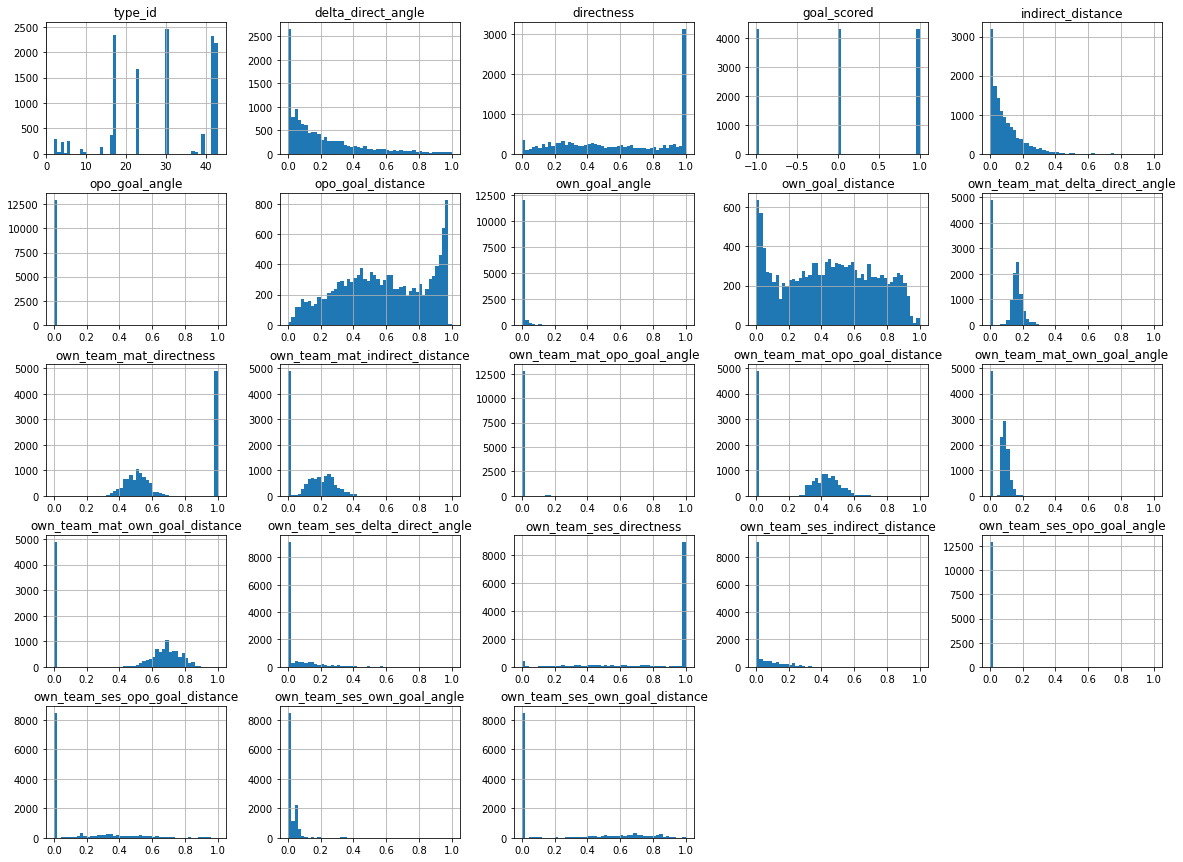

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt


fig = plt.figure()
dataset.hist(bins=50, figsize=(20, 15))

plt.show()

<AxesSubplot:xlabel='goal_scored', ylabel='own_team_mat_delta_direct_angle'>

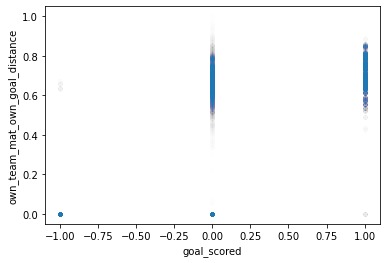

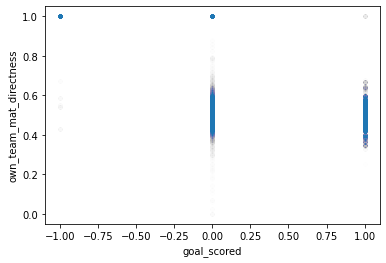

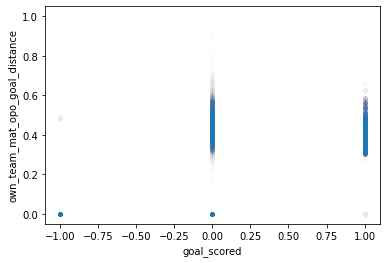

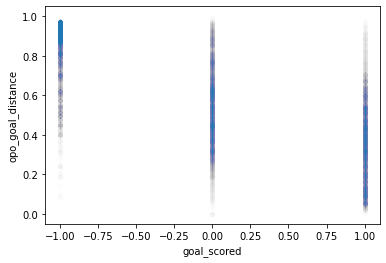

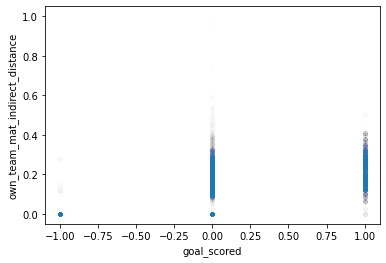

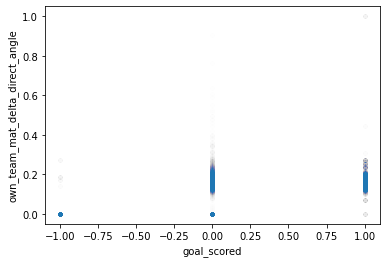

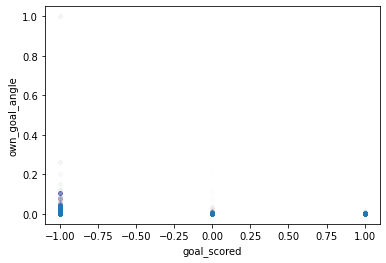

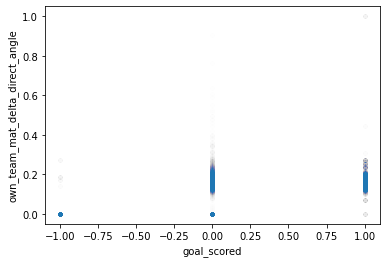

In [13]:
alpha = 0.005

dataset.plot(kind="scatter", x="goal_scored", y="own_team_mat_own_goal_distance", alpha=alpha)

dataset.plot(kind="scatter", x="goal_scored", y="own_team_mat_directness", alpha=alpha)

dataset.plot(kind="scatter", x="goal_scored", y="own_team_mat_opo_goal_distance", alpha=alpha)

dataset.plot(kind="scatter", x="goal_scored", y="opo_goal_distance", alpha=alpha)

dataset.plot(kind="scatter", x="goal_scored", y="own_team_mat_indirect_distance", alpha=alpha)

dataset.plot(kind="scatter", x="goal_scored", y="own_team_mat_delta_direct_angle", alpha=alpha)

dataset.plot(kind="scatter", x="goal_scored", y="own_goal_angle", alpha=alpha)

dataset.plot(kind="scatter", x="goal_scored", y="own_team_mat_delta_direct_angle", alpha=alpha)


printing figure scatter_matrix_plot


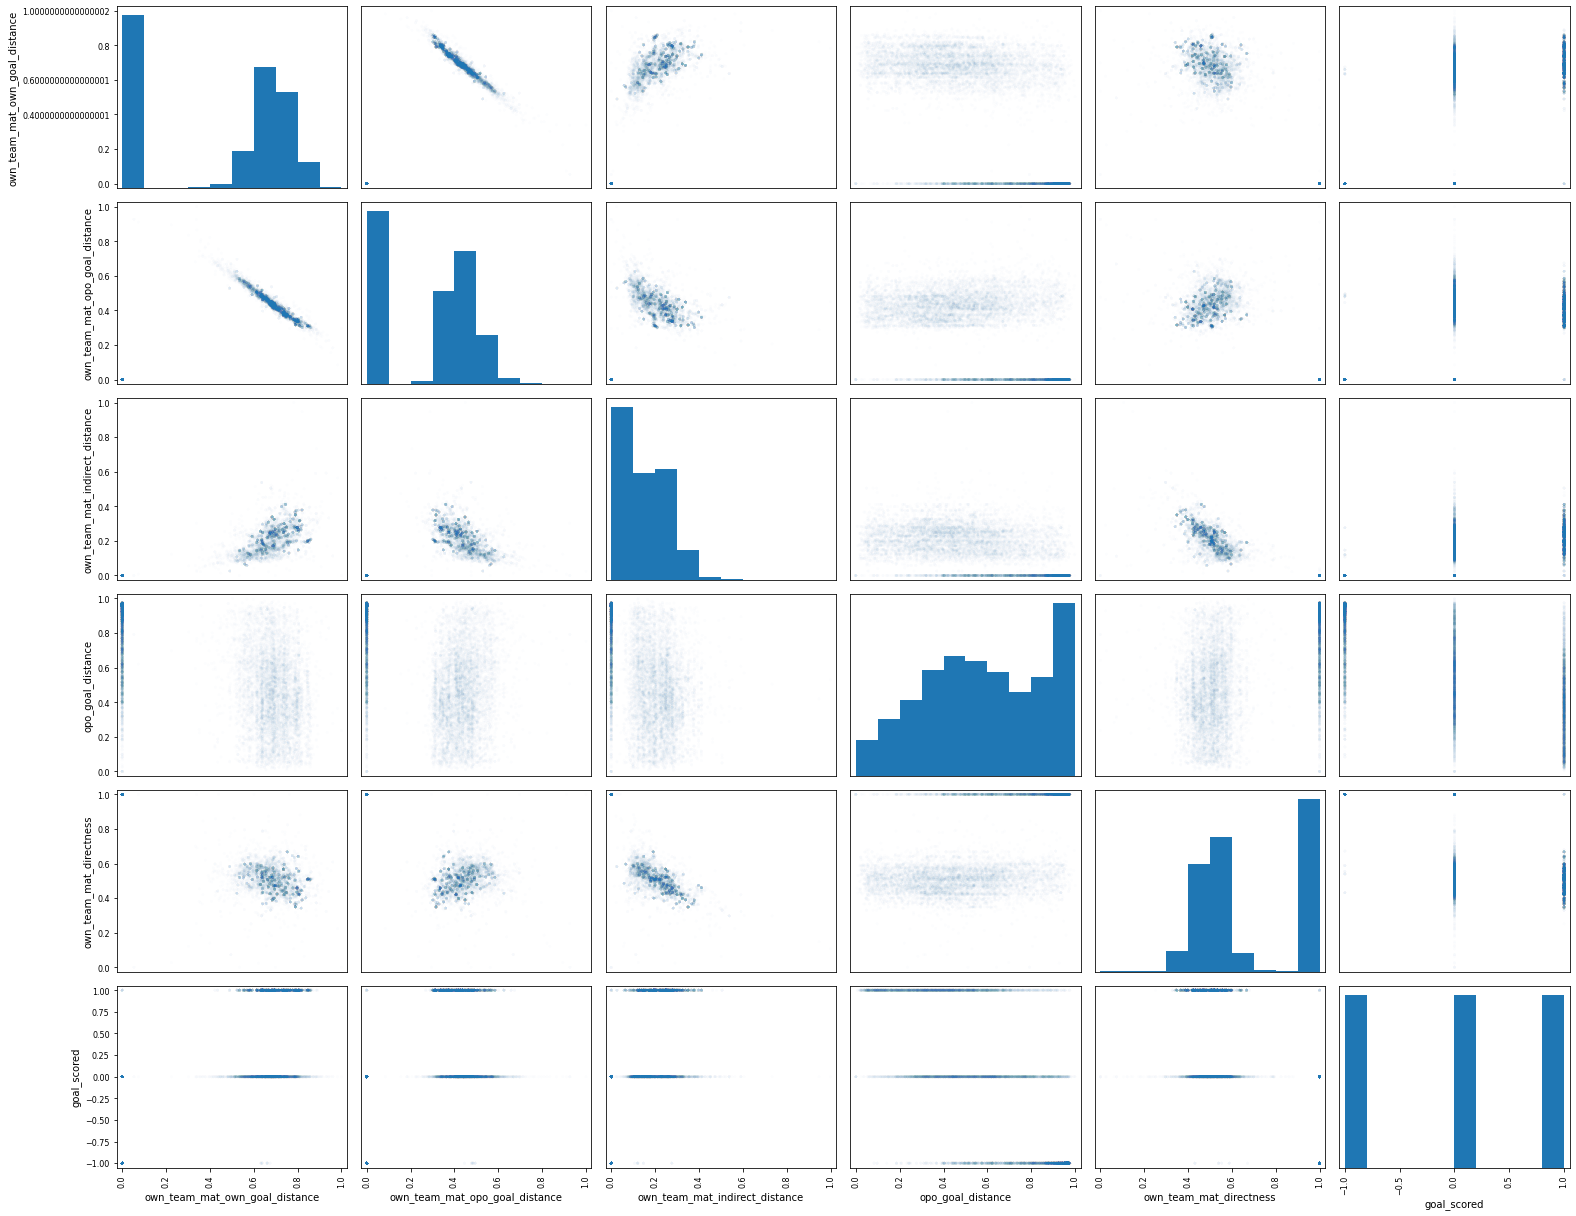

In [14]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join("imgs", fig_id + "." + fig_extension)
    print("printing figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    #plt.savefig(path, format=fig_extension, dpi=resolution)


attributes = [    
    "own_team_mat_own_goal_distance",
    "own_team_mat_opo_goal_distance",
    "own_team_mat_indirect_distance",
    "opo_goal_distance",
    "own_team_mat_directness",
    #"type_id",
    "goal_scored"
]

scatter_matrix(dataset[attributes], figsize=(22, 17), alpha=0.01)

save_fig("scatter_matrix_plot")

# Data modelling

> The data is now split between training and test data.

In [15]:
from sklearn.model_selection import train_test_split


y = dataset['goal_scored']

X = dataset[dataset.columns.difference(['goal_scored', 'type_name'])]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

> Initialised the Guassian Naive Bayes classifier

In [16]:

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()


> The model has a multi label class so the confusion matrix is 3x3, instead of the clasic 2x2

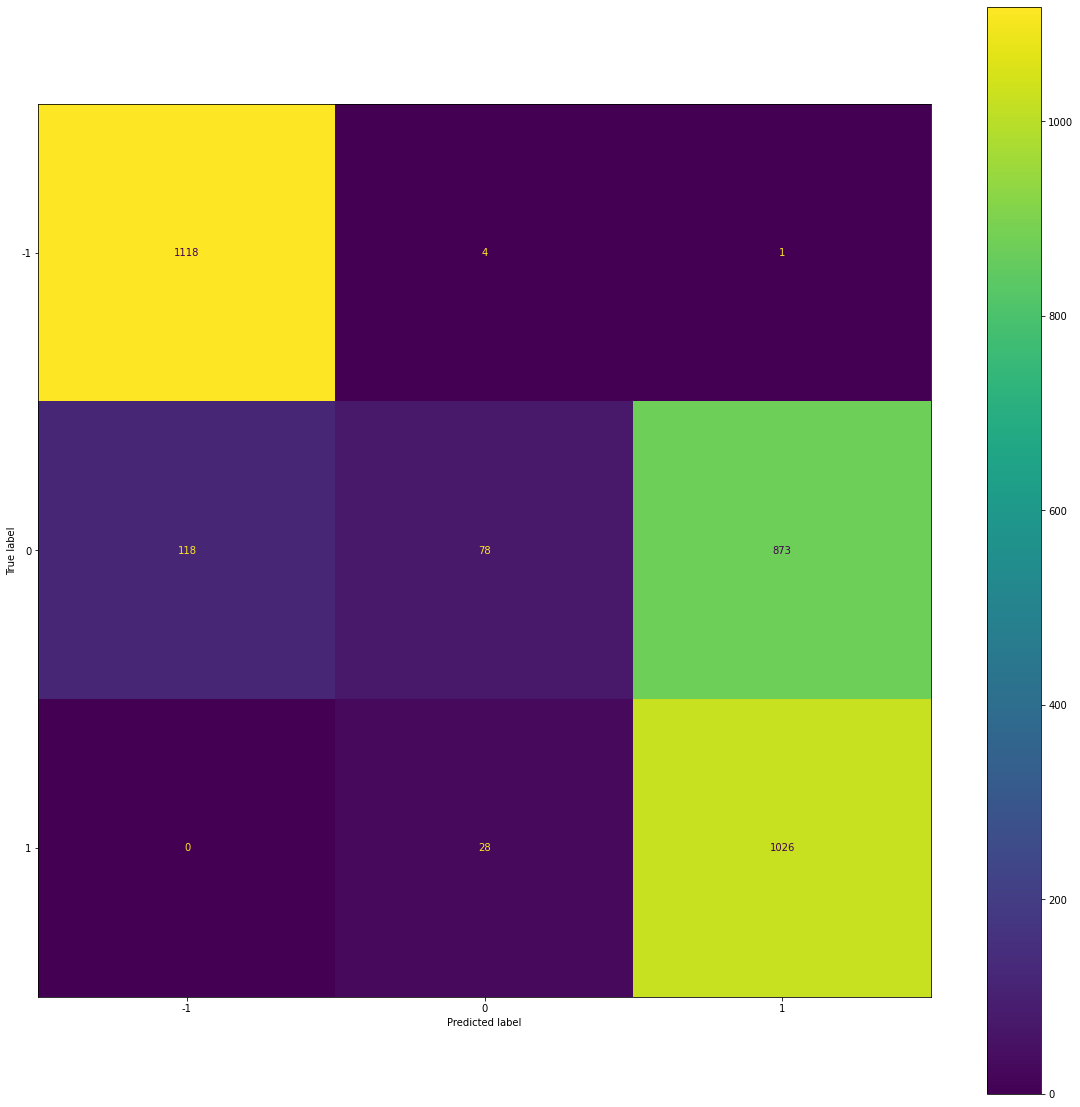

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

clf.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(20, 20))

plot_confusion_matrix(clf, X_test, y_test, ax=ax)  


plt.show()

> Another version of the confusion matrix

In [18]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
cm

array([[1118,    4,    1],
       [ 118,   78,  873],
       [   0,   28, 1026]])

> Here are the many different model metrics, to evaluate the model's effectiveness

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))
# https://towardsdatascience.com/multi-class-classification-extracting-performance-metrics-from-the-confusion-matrix-b379b427a872

TP = np.diag(cm)
FP = cm.sum(axis=0) - TP
FN = cm.sum(axis=1) - TP
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity
SENS = np.average(TP/(TP+FN))
print("Sensitivity: " + str(SENS))

# Specificity
SPEC = np.average(TN/(TN+FP))
print("Specificity: " + str(SPEC))

# Average Success rate
ASR = np.average((TP+TN)/(TP+FP+FN+TN))
print("Average Success rate: " + str(ASR))

# Average Error rate
AER = 1 - ASR
print("Average Error rate: " + str(AER))

Precision: 0.72
Recall: 0.68
F1-score: 0.59

Sensitivity: 0.6806491878556601
Specificity: 0.8436655070159823
Average Success rate: 0.7896898747176011
Average Error rate: 0.2103101252823989


> Here is the classificatio report, also showing some metrics but focused on each label

In [20]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.90      1.00      0.95      1123
           0       0.71      0.07      0.13      1069
           1       0.54      0.97      0.69      1054

    accuracy                           0.68      3246
   macro avg       0.72      0.68      0.59      3246
weighted avg       0.72      0.68      0.60      3246



> The ROC score. The ROC area could not be calculated because it is not possible to do it for a multilabel class

In [21]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, clf.predict_proba(X_train), multi_class='ovr')

0.8571157962836043

## Clustering


This section will focus on trying and evaluating many different including soft, hard and hierarchical clustering algorithms. 

I tried, following that to get metrics for different numbers of clusters for the k-means algorithm.

At the end, I plotted the intertia to visualise how it varies according to the number os k_means

In [22]:
from sklearn.metrics.cluster import rand_score, adjusted_rand_score, adjusted_mutual_info_score, v_measure_score


def evaluate_clustering_algorithm(y_pred, X_test, y_test):

    return rand_score(y_test, y_pred), adjusted_rand_score(y_test, y_pred), adjusted_mutual_info_score(y_test, y_pred), v_measure_score(y_test, y_pred)
    
def print_clustering_evaluation(y_pred, X_test, y_test):
    
    rand_score, adjusted_rand_score, adjusted_mutual_info_score, v_measure_score = evaluate_clustering_algorithm(y_pred, X_test, y_test)
    print("rand_score: " + str(rand_score))
    
    
    print("adjusted_rand_score: " + str(adjusted_rand_score))
    
    
    print("adjusted_mutual_info_score: " + str(adjusted_mutual_info_score))
    
    
    print("v_measure_score: " + str(v_measure_score))
    

In [23]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, algorithm="full", max_iter=6, random_state=123).fit(X_train)

y_pred = kmeans.predict(X_test)

print_clustering_evaluation(y_pred, X_test, y_test)

rand_score: 0.6023297608434988
adjusted_rand_score: 0.10806505174609972
adjusted_mutual_info_score: 0.10688391654631918
v_measure_score: 0.1073868134417063


I got a decent result with the K-means cluster. This algorithm is very versatile and performs well on large datasets such as this one. However it does not get the optimal result because the data has high dimensionality (about 20 features) so its euclidean distance get "inflated"

In [24]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=2, random_state=123).fit(X_train)

y_pred = gm.predict(X_test)

print_clustering_evaluation(y_pred, X_test, y_test)

rand_score: 0.5721558452408416
adjusted_rand_score: 0.17036888584825444
adjusted_mutual_info_score: 0.21189859158082477
v_measure_score: 0.2121773223709227


The Guassian mixture performs very well because it is a soft clustering algorithm. The dataset has many values but their clusters are not defined by regions. This is because it groups values by their own Guassian distribution.

In [25]:
from sklearn.mixture import BayesianGaussianMixture


bgm = BayesianGaussianMixture(n_components=2, random_state=123).fit(X_train)

y_pred = bgm.predict(X_test)


print_clustering_evaluation(y_pred, X_test, y_test)

rand_score: 0.5721558452408416
adjusted_rand_score: 0.17036888584825444
adjusted_mutual_info_score: 0.21189859158082477
v_measure_score: 0.2121773223709227


The Bayesian Guassian mixture performed very well as well because it combines the advantages of Guassian mixture plus the Bayes algorithm.

In [26]:
from sklearn.cluster import DBSCAN


dbscan = DBSCAN(eps=3, min_samples=2).fit(X_train)

y_pred = dbscan.fit_predict(X_test)

print_clustering_evaluation(y_pred, X_test, y_test)

rand_score: 0.6861158975322953
adjusted_rand_score: 0.23176303412296373
adjusted_mutual_info_score: 0.3197948984886929
v_measure_score: 0.3208899067535498


This algorithm performed better than K-means but it did not reach the Guassian mixtures methods quality. It performed better than K-means because it assumes that clusters can be of any shape which can be usefull since the same type event of event in this dataset might have slightly different types of results.

In [27]:
kmeans_per_k = [KMeans(n_clusters=k, init="random", n_init=1, algorithm="full", max_iter=4, random_state=123).fit(X_train) \
                for k in range(1, 10)]


for km in kmeans_per_k:
    print("\n\n\nKmeans model with " + str(km.n_clusters) + " clusters\n")
    print_clustering_evaluation(km.predict(X_test), X_test, y_test)




Kmeans model with 1 clusters

rand_score: 0.33337795385478586
adjusted_rand_score: 0.0
adjusted_mutual_info_score: 0.0
v_measure_score: 0.0



Kmeans model with 2 clusters

rand_score: 0.657255534131376
adjusted_rand_score: 0.31900005335159093
adjusted_mutual_info_score: 0.3019805776399065
v_measure_score: 0.30222217072315305



Kmeans model with 3 clusters

rand_score: 0.6714027078010912
adjusted_rand_score: 0.3245533406869291
adjusted_mutual_info_score: 0.29796764939113274
v_measure_score: 0.2984070202653353



Kmeans model with 4 clusters

rand_score: 0.6841470882261634
adjusted_rand_score: 0.27952045495873723
adjusted_mutual_info_score: 0.26231497574593327
v_measure_score: 0.2628999196319775



Kmeans model with 5 clusters

rand_score: 0.6629145554989097
adjusted_rand_score: 0.1934514060543782
adjusted_mutual_info_score: 0.26029496379199096
v_measure_score: 0.26100409869196795



Kmeans model with 6 clusters

rand_score: 0.6759258995544594
adjusted_rand_score: 0.2159181048252179

The K-means clustering has a very stable value with different number of clusters. This hints that it is performing to the best of its capabilities and increasing the number of clusters will not increase its performance. The best overall value for all scores is for 7 clusters.

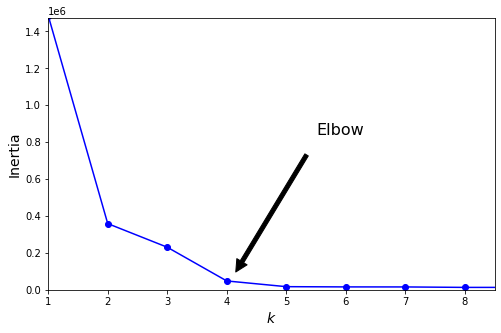

In [28]:
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[5]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1472677])
plt.show()

The k-means algorithm converges its internal coherence from 4 clusters. This means that it should be the ran with 4 clusters at the least.

In [29]:
k_means = kmeans_per_k[5 - 1]

In [30]:
k_means.cluster_centers_

array([[2.57201578e-01, 5.66374963e-01, 1.00762748e-01, 5.52558888e-04,
        4.83464345e-01, 1.79987604e-03, 5.47875496e-01, 1.54074446e-01,
        5.48921282e-01, 1.97250396e-01, 1.33877515e-02, 3.90341637e-01,
        8.44888941e-02, 6.25596235e-01, 7.53402835e-02, 7.55615505e-01,
        5.82582039e-02, 6.47538628e-04, 2.03918773e-01, 3.21417853e-02,
        3.16382038e-01, 4.21341170e+01],
       [7.26168131e-02, 5.56357454e-01, 1.05191545e-01, 2.18031974e-04,
        9.49202344e-01, 3.95786113e-02, 3.46641316e-02, 5.61291604e-04,
        9.98472201e-01, 5.70835834e-04, 3.01265187e-05, 1.57188825e-03,
        3.37382796e-04, 2.08341131e-03, 7.08676746e-04, 9.98151658e-01,
        2.37979396e-04, 2.41392152e-06, 2.19923000e-03, 1.68448468e-04,
        1.35932742e-03, 2.30000000e+01],
       [1.93794704e-01, 5.73019148e-01, 9.52080935e-02, 6.16344548e-04,
        5.84415198e-01, 2.56137374e-03, 4.38930035e-01, 3.22880034e-02,
        9.03463505e-01, 4.15771122e-02, 3.07919745e-03

# Decision Trees

In [59]:
def print_evaluation(y_true, y_pred):
    print("accuracy_score " + str(accuracy_score(y_true, y_pred)))
    print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.90      1.00      0.94      1123
           0       0.54      0.83      0.65      1069
           1       0.84      0.28      0.42      1054

    accuracy                           0.71      3246
   macro avg       0.76      0.70      0.67      3246
weighted avg       0.76      0.71      0.68      3246

accuracy_score 0.708256315465188

              precision    recall  f1-score   support

          -1       0.92      0.97      0.95      1123
           0       0.69      0.38      0.49      1069
           1       0.61      0.85      0.71      1054

    accuracy                           0.74      3246
   macro avg       0.74      0.74      0.72      3246
weighted avg       0.74      0.74      0.72      3246

accuracy_score 0.7399876771410967

              precision    recall  f1-score   support

          -1       0.92      0.97      0.95      1123
           0       0.67      0.57      0.61      1069
     

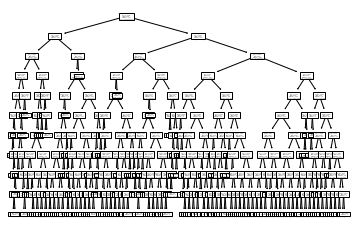

In [62]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)



for i in range(2, 11):
    tree_clf = DecisionTreeClassifier(max_depth=i, random_state=42)
    tree_clf.fit(X_train, y_train)
    print("")
    print_evaluation(y_test, tree_clf.predict(X_test))
    

_ = plot_tree(tree_clf)

In [32]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

for i in range(3, 6 +1): 
    print(str(i) + "  " + str(6-i+3))


3  6
4  5
5  4
6  3


In [35]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict



tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

kf = KFold(n_splits=10, shuffle=True, random_state=123)

cv_scores = cross_val_score(tree_clf, X_test, y_test, cv=kf)

cv_scores.mean()

0.7304425451092118

In [36]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)